In [2]:
#难度分析
# coding=utf-8

import os
import pandas as pd
import numpy as np
import nltk
from collections import Counter

ROOTDIR = os.path.abspath(os.path.abspath(os.path.join(os.getcwd(), "..")))
DATADIR = os.path.join(ROOTDIR, 'data')
MODELDIR = os.path.join(ROOTDIR, 'model')

In [3]:
from gensim import corpora
from gensim import models

dictionary_zh = corpora.Dictionary.load(MODELDIR + '/question_zh.dict')
w2v_model_zh = models.Word2Vec.load(MODELDIR + "/word2vec_zh.model")
df = pd.read_csv(os.path.join(DATADIR, 'question.csv'), nrows=100000)

In [4]:
texts_zh= df.translatedContent

In [5]:
#分词
import jieba

tokenized_zh = [list(jieba.cut(question, HMM=False)) for question in texts_zh]

frequent_tokenized_zh = []
for sentence in tokenized_zh:
    ind_list = dictionary_zh.doc2idx(sentence)
    words = []
    for i,ind in enumerate(ind_list):
        if ind != -1:
            words.append(sentence[i])
    frequent_tokenized_zh.append(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\frank\AppData\Local\Temp\jieba.cache
Loading model cost 0.489 seconds.
Prefix dict has been built successfully.


In [6]:
print(frequent_tokenized_zh[0])

['给定', '一个', '整数', '数组', ' ', 'nums', ' ', '和', '一个', '目标值', ' ', 'target', '，', '请', '你', '在', '该', '数组', '中', '找出', '和', '为', '目标值', '的', '那', ' ', '两个', ' ', '整数', '，', '并', '返回', '他们', '的', '数组', '下标', '。', '\n', '你', '可以', '假设', '每种', '输入', '只', '会', '对应', '一个', '答案', '。', '但是', '，', '数组', '中', '同一个', '元素', '不能', '使用', '两遍', '。', '\n', ' ', '\n', '示例', ':', '\n', '给定', ' ', 'nums', ' ', '=', ' ', '[', '2', ',', ' ', '7', ',', ' ', '11', ',', ' ', '15', ']', ',', ' ', 'target', ' ', '=', ' ', '9', '\n', '因为', ' ', 'nums', '[', '0', ']', ' ', '+', ' ', 'nums', '[', '1', ']', ' ', '=', ' ', '2', ' ', '+', ' ', '7', ' ', '=', ' ', '9', '\n', '所以', '返回', ' ', '[', '0', ',', ' ', '1', ']', '\n']


In [7]:
#分词
from nltk.corpus import stopwords
from string import punctuation
from itertools import chain
from tqdm import tqdm

def clean_text(tokenized_list, sw, punct):
    new_list = []
    for doc in tqdm(tokenized_list):
        new_list.append([token.lower() for token in doc if token.lower() not in chain(punct, sw)])
    return new_list

sw_en = stopwords.words('english')
punct_en = ' \n'+'!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
punct_zh =  '《》，。？/：；‘’“”{}【】、|—·！~ \n'+'!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
sw_zh = []
with open (DATADIR + "/cn_stopwords.txt", 'r', encoding='utf8') as f:
    sw_zh = f.read().split('\n')
    
cleaned_zh = clean_text(frequent_tokenized_zh, sw_zh, punct_zh)

100%|█████████████████████████████████████████████████████████████████████████████| 1157/1157 [00:01<00:00, 579.46it/s]


In [8]:
cleaned_zh[7]

['请',
 '实现',
 '一个',
 '函数',
 '字符串',
 '转换成',
 '整数',
 '函数',
 '会',
 '需要',
 '开头',
 '空格',
 '字符',
 '寻找',
 '第一个',
 '非',
 '空格',
 '字符',
 '接下来',
 '转化',
 '规则',
 '\t',
 '第一个',
 '非',
 '正',
 '负号',
 '时',
 '符号',
 '后面',
 '尽可能',
 '连续',
 '数字',
 '字符',
 '组合',
 '起来',
 '形成',
 '一个',
 '符号',
 '整数',
 '\t',
 '第一个',
 '非',
 '数字',
 '直接',
 '之后',
 '连续',
 '数字',
 '字符',
 '组合',
 '起来',
 '形成',
 '一个',
 '整数',
 '\t',
 '字符串',
 '有效',
 '整数',
 '部分',
 '之后',
 '可能',
 '会',
 '存在',
 '多余',
 '字符',
 '字符',
 '忽略',
 '函数',
 '应该',
 '造成',
 '影响',
 '注意',
 '字符串',
 '中',
 '第一个',
 '非',
 '空格',
 '字符',
 '一个',
 '有效',
 '整数',
 '字符',
 '字符串',
 '空',
 '字符串',
 '仅',
 '包含',
 '空白',
 '字符',
 '时',
 '函数',
 '需要',
 '进行',
 '转换',
 '无法',
 '进行',
 '有效',
 '转换',
 '情况',
 '函数',
 '不能',
 '进行',
 '有效',
 '转换',
 '时',
 '请',
 '返回',
 '提示',
 '\t',
 '本题',
 '中',
 '空白',
 '字符',
 '包括',
 '空格',
 '字符',
 '\t',
 '假设',
 '环境',
 '只能',
 '存储',
 '32',
 '位',
 '大小',
 '符号',
 '整数',
 '数值',
 '范围',
 '231',
 '231',
 '数值',
 '超过',
 '范围',
 '请',
 '返回',
 'int',
 'max',
 '231',
 'int',
 '231',
 '示例',
 '输入',
 '42',
 '输出'

In [9]:
vec_zh = np.array([w2v_model_zh.wv[q].sum(axis=0)/len(q) for q in cleaned_zh])

del cleaned_zh

In [10]:
vec_zh[0]

array([ 0.43103325,  0.0360846 ,  0.39615297,  0.6381981 , -0.085049  ,
        0.04093946, -0.6049238 ,  0.17438114,  0.6403803 ,  0.54130864,
       -0.7390599 ,  0.14174323, -0.35750473, -0.2932794 ,  0.20000586,
       -0.099351  ,  0.4048941 ,  0.46955442,  0.20348316, -0.0607734 ,
       -0.10044172,  0.05286546, -0.34681422,  0.00929286,  0.29727829,
        0.45557943, -0.8683909 , -0.6683247 , -0.4011617 , -0.30180654,
        0.3756954 ,  0.47482458, -0.5685826 ,  0.1536928 ,  0.376837  ,
        0.02324097,  0.9508312 , -0.1850929 , -1.0164165 , -0.83583087,
       -0.16840978, -0.04556242, -0.2157654 , -0.750401  , -0.6608275 ,
        0.5866044 , -0.4934889 , -0.3113054 ,  0.124686  ,  1.4223927 ,
        0.67270374,  0.41499957, -0.7361785 ,  0.37390894, -0.4476009 ,
       -0.23917863,  0.2447273 , -0.30522513,  0.61338603,  0.26457918,
        0.7584073 ,  0.47170392, -0.31533238, -0.3899771 , -0.5451417 ,
       -0.33931842,  0.13131502,  0.23023726, -0.39810032, -0.11

**以下是根据question.csv中difficulty训练的模型，已弃用。**

In [54]:
#用数字表示难度
def str2int(s):
    return 0 if s=='Easy' else (1 if s=='Medium' else 2)
difficulty_int = np.array([str2int(s) for s in df.difficulty])

difficulty_int

array([0, 1, 1, ..., 1, 1, 2])

In [139]:
from sklearn.model_selection import train_test_split

seed = 42
test_size = 0.33

X = vec_zh
X = np.insert(X, 0, 1, axis=1)
y = difficulty_int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [95]:
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# check the accuracy on the training set
lr.score(X_test, y_test)

C:\Users\frank\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.49476439790575916

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# check the accuracy on the training set
clf.score(X_test, y_test)

0.5209424083769634

## feature engineering

1. length of every question
2. number of tokens in every question
3. number of "numbers" in every question

In [111]:
#增加题目的特征
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    return False

def cal_numbers(tokens):
    num = 0
    for t in tokens:
        if is_number(t):
            num += 1
    return num

In [119]:
# 1. length of every question
f_1 = np.array([[len(q) for q in texts_zh]])

# 2. number of tokens in every question
f_2 = np.array([[len(q) for q in tokenized_zh]])

# 3. number of "numbers" in every question
f_3 = np.array([[cal_numbers(q) for q in tokenized_zh]])

In [136]:
X = vec_zh
X = np.insert(X_norm, 0, 1, axis=1)
X = np.c_[X,f_1.T]
X = np.c_[X,f_2.T]
X = np.c_[X,f_3.T]
X.shape

(1157, 304)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# check the accuracy on the training set
clf.score(X_test, y_test)

0.48429319371727747

**以下是根据question.csv中totalAccepted和totalSubmission训练的模型**

In [11]:
totalAccepted = np.array(df.totalAccepted)

totalAccepted

array([1179287,  467429,  551133, ...,    3405,    2031,     959],
      dtype=int64)

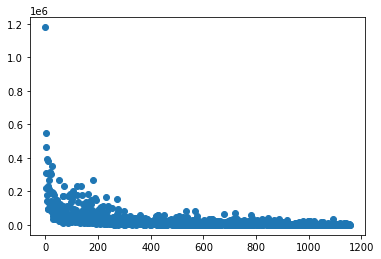

In [12]:
#通过数 长尾分布
#通过数/提交数 均匀分布
%matplotlib inline

import matplotlib 
import matplotlib.pyplot as plt

x = np.array(range(len(totalAccepted)))
y = totalAccepted
plt.scatter(x, y)
plt.show()

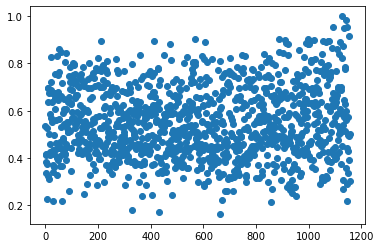

In [13]:
totalSubmission = np.array(df.totalSubmission)

corrected_totalAccepted = totalAccepted/totalSubmission
corrected_totalAccepted = corrected_totalAccepted/corrected_totalAccepted.max()

x = np.array(range(len(totalAccepted)))
y = corrected_totalAccepted
plt.scatter(x, y)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

seed = 42
test_size = 0.33

X = vec_zh
X = np.insert(X, 0, 1, axis=1)
y = corrected_totalAccepted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### ridge regression

In [15]:
from sklearn import linear_model

linear_reg = linear_model.Ridge(alpha=0.5)
linear_reg = linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

# check the accuracy on the training set
linear_reg.score(X_test, y_test)

-0.28283801183586044

### svm regression

In [16]:
from sklearn import svm

svm_reg = svm.SVR()
svm_reg = svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

# check the accuracy on the training set
svm_reg.score(X_test, y_test)

-0.026555941798890093

### Voting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()

vot_reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
vot_reg = vot_reg.fit(X_train, y_train)

y_pred = vot_reg.predict(X_test)

# check the accuracy on the training set
vot_reg.score(X_test, y_test)

-0.02210258546649757

### NN Regressor with sigmoid

In [18]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class NN_reg(torch.nn.Module):
    def __init__(self,feature_num):
        super(NN_reg, self).__init__()
        self.l = torch.nn.Linear(feature_num, 1)
        self.s = nn.Sigmoid()

    def forward(self, x):
        x = self.l(x)
        x = self.s(x)
        return x
    
X = torch.tensor(vec_zh).float()
y = torch.tensor(corrected_totalAccepted)
y = torch.reshape(y,(-1,1)).float()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

net = NN_reg(X.shape[1])
print(net)

NN_reg(
  (l): Linear(in_features=300, out_features=1, bias=True)
  (s): Sigmoid()
)


In [19]:
loss_func = torch.nn.MSELoss() 
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)
#训练
for t in range(2000):
    prediction = net(X_train)
    loss = loss_func(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [20]:
#测试
from sklearn.metrics import r2_score
prediction = net(X_test)
r2_score(y_test,prediction.data.numpy())

0.04175652152224241

# 题目难度分析

In [23]:
texts = df.translatedContent

In [25]:
import jieba
from nltk.corpus import stopwords
from string import punctuation
from itertools import chain
from tqdm import tqdm

dictionary = corpora.Dictionary.load(MODELDIR + '/question_zh.dict')
tokenized = [list(jieba.cut(question, HMM=False)) for question in texts]

frequent_tokenized = []
for sentence in tokenized:
    ind_list = dictionary.doc2idx(sentence)
    words = []
    for i,ind in enumerate(ind_list):
        if ind != -1:
            words.append(sentence[i])
    frequent_tokenized.append(words)
    


def clean_text(tokenized_list, sw, punct):
    new_list = []
    for doc in tqdm(tokenized_list):
        new_list.append([token.lower() for token in doc if token.lower() not in chain(punct, sw)])
    return new_list

punct =  '《》，。？/：；‘’“”{}【】、|—·！~ \n'+'!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
sw = []
with open (DATADIR + "/cn_stopwords.txt", 'r', encoding='utf8') as f:
    sw = f.read().split('\n')
    
cleaned = clean_text(frequent_tokenized, sw, punct)

100%|█████████████████████████████████████████████████████████████████████████████| 1157/1157 [00:02<00:00, 577.40it/s]


In [31]:
vec = np.array([w2v_model_zh.wv[q].sum(axis=0)/len(q) for q in cleaned])

torch.tensor(vec).float().shape

torch.Size([1157, 300])

In [69]:
prediction = net(torch.tensor(vec).float())

difficulty = prediction.data.numpy()
difficulty

array([[0.5595547 ],
       [0.5141993 ],
       [0.49719226],
       ...,
       [0.5154109 ],
       [0.5455286 ],
       [0.5535108 ]], dtype=float32)

In [73]:
print(min(difficulty))
print(max(difficulty))

[0.18150377]
[0.9385168]


In [70]:
difficulty = difficulty/(max(difficulty) - min(difficulty) + 0.1) - 0.8

In [41]:
result_df = pd.read_csv(os.path.join(DATADIR, 'leetcode_result.csv'), nrows=100000)

result_df

,questionId,lite_score,sch_score,d2_score,oral_score
0,1,0.200000,0.900000,0.500000,0.200000
1,2,0.142857,0.857143,0.571429,0.142857
2,3,0.208333,0.875000,0.541667,0.100000
3,4,0.500000,0.750000,0.250000,0.125000
4,5,0.111111,0.777778,0.666667,0.333333
...,...,...,...,...,...
1152,1622,0.161290,0.677419,0.129032,0.419355
1153,1626,0.142857,0.785714,0.428571,0.100000
1154,1627,0.183673,0.530612,0.448980,0.142857
1155,1628,0.200000,0.500000,0.400000,0.100000


In [75]:
result_df['diffculty'] = difficulty

result_df

,questionId,lite_score,sch_score,d2_score,oral_score,diffculty
0,1,0.200000,0.900000,0.500000,0.200000,0.559645
1,2,0.142857,0.857143,0.571429,0.142857,0.449437
2,3,0.208333,0.875000,0.541667,0.100000,0.408112
3,4,0.500000,0.750000,0.250000,0.125000,0.532104
4,5,0.111111,0.777778,0.666667,0.333333,0.467431
...,...,...,...,...,...,...
1152,1622,0.161290,0.677419,0.129032,0.419355,0.498648
1153,1626,0.142857,0.785714,0.428571,0.100000,0.657149
1154,1627,0.183673,0.530612,0.448980,0.142857,0.452381
1155,1628,0.200000,0.500000,0.400000,0.100000,0.525563


In [76]:
result_df.to_csv(os.path.join(DATADIR, 'leetcode_result.csv'),index=0)